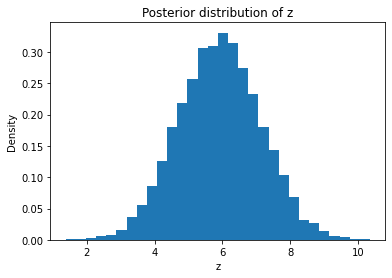

In [4]:
import numpy as np
from scipy.stats import norm, beta
import matplotlib.pyplot as plt

def gibbs_sampler(x, y, alpha, bt, num_iterations, burn_in):
    # Initialize z and p
    z = np.mean([x, y])
    p = beta.rvs(alpha, bt)

    # Initialize arrays to store samples
    z_samples = np.zeros(num_iterations)
    p_samples = np.zeros(num_iterations)

    for i in range(num_iterations):
        # Sample z from its conditional distribution
        mu_z = (p * np.mean(x)) + ((1 - p) * np.mean(y))
        sigma_z = np.sqrt((np.var(x) * np.var(y)) / (np.var(x) + np.var(y)))
        z = norm.rvs(mu_z, sigma_z)

        # Sample p from its conditional distribution
        a = alpha + 0.5
        b = bt + 0.5
        p = beta.rvs(a, b)

        # Store samples
        z_samples[i] = z
        p_samples[i] = p

    # Discard burn-in samples and return posterior samples
    return z_samples[burn_in:], p_samples[burn_in:]


# Generate some data
np.random.seed(42)
x = np.random.normal(loc=5, scale=2, size=100)
y = np.random.normal(loc=7, scale=1.5, size=100)

# Run the Gibbs sampler
z_samples, p_samples = gibbs_sampler(x, y, 2, 2, 10000, 1000)

# Plot the posterior distribution of z
plt.hist(z_samples, bins=30, density=True)
plt.title("Posterior distribution of z")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()

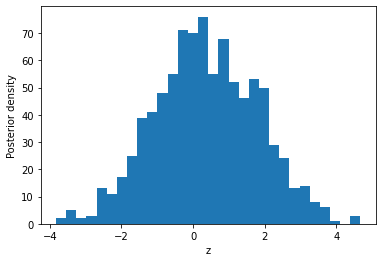

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def gibbs_sampler(x, y, num_iterations, burn_in):
    # Initialize z
    z = np.mean([x, y])

    # Initialize array to store samples
    z_samples = np.zeros(num_iterations)

    for i in range(num_iterations):
        # Sample z from its conditional distribution
        mu_z = np.mean([x, y])
        sigma_z = np.sqrt(np.var(x) + np.var(y))
        z = norm.rvs(mu_z, sigma_z)

        # Store sample
        z_samples[i] = z

    # Discard burn-in samples and return posterior samples
    return z_samples[burn_in:]

import matplotlib.pyplot as plt

# Generate some example data
x = np.random.normal(0, 1, size=100)
y = np.random.normal(1, 1, size=100)

# Run the Gibbs sampler
num_iterations = 1000
burn_in = 100
z_samples = gibbs_sampler(x, y, num_iterations, burn_in)

# Plot the posterior distribution of z
plt.hist(z_samples, bins=30)
plt.xlabel('z')
plt.ylabel('Posterior density')
plt.show()


# Example 5.10

In [16]:
import numpy as np
from scipy.stats import norm, gamma, bernoulli

# Set up prior hyperparameters
alpha = 1
beta = 1
xi = 0
psi = 1
N=100
w1=np.random.normal(-5, 1, size=int(N/2))
w2=np.random.normal(5, 1, size=int(N/2))


# Set up initial values
tau = 1 / np.var(np.concatenate((w1, w2)))
mu1 = np.mean(w1)
mu2 = np.mean(w2)
s = np.zeros(N)

# Define the conditional distributions
def sample_tau(mu1, mu2, s, w):
    alpha_new = alpha + N / 2
    beta_new = beta + np.sum((w - mu1 * s - mu2 * (1 - s)) ** 2) / 2
    return gamma.rvs(alpha_new, scale=1/beta_new)

def sample_mu1(tau, mu2, s, w):
    psi_new = psi + np.sum(s)
    xi_new = (psi * xi + np.sum(w * s)) / psi_new
    return norm.rvs(loc=xi_new, scale=1/np.sqrt(psi_new * tau))

def sample_mu2(tau, mu1, s, w):
    psi_new = psi + np.sum(1 - s)
    xi_new = (psi * xi + np.sum(w * (1 - s))) / psi_new
    return norm.rvs(loc=xi_new, scale=1/np.sqrt(psi_new * tau))

def sample_s(tau, mu1, mu2, w):
    p = np.array([norm.pdf(w, loc=mu1, scale=1/np.sqrt(tau)), 
                  norm.pdf(w, loc=mu2, scale=1/np.sqrt(tau))])
    p *= np.array([1 - omega, omega]).reshape(-1, 1)
    p /= np.sum(p, axis=0)
    return bernoulli.rvs(p[1])

# Run the Gibbs sampler
num_iterations = 1000
burn_in = 100
samples = np.zeros((num_iterations, 4 + N))
for i in range(num_iterations):
    tau = sample_tau(mu1, mu2, s, np.concatenate((w1, w2)))
    mu1 = sample_mu1(tau, mu2, s, w1)
    mu2 = sample_mu2(tau, mu1, s, w2)
    s = sample_s(tau, mu1, mu2, np.concatenate((w1, w2)))
    samples[i] = np.concatenate((tau.reshape(1,), mu1.reshape(1,), mu2.reshape(1,), s))
samples = samples[burn_in:]

# Plot the posterior distributions
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot the posterior distribution of tau
plt.subplot(2, 2, 1)
plt.hist(samples[:, 0], bins=30)
plt.xlabel('tau')
plt.ylabel('Posterior density')

# Plot the posterior distribution of mu1
plt.subplot(2, 2, 2)
plt.hist(samples[:, 1], bins=30)
plt.xlabel('mu1')
plt.ylabel('Posterior density')

# Plot the posterior distribution of mu2
plt.subplot(2, 2, 3)
plt.hist(samples[:, 2], bins=30)
plt.xlabel('mu2')
plt.ylabel('Posterior density')

# Plot the posterior distribution of s
# plt.subplot(2, 2, 4)
# plt.hist(samples[:, 3:], bins=30, label=['s{}'.format(i+1) for i in range(N


ValueError: operands could not be broadcast together with shapes (50,) (100,) 

In [7]:
import numpy as np
import scipy.stats as stats

# Set up prior parameters
alpha = 1
beta = 1
xi = 0
psi = 1

# Set up initial values for parameters and indicators
tau = 1 / np.var(np.concatenate([w1, w2]))
mu1 = np.mean(w1)
mu2 = np.mean(w2)
s = np.zeros(N, dtype=int)

# Define conditional posterior distributions for each parameter
def sample_tau(mu1, mu2, s, w1, w2):
    alpha_new = alpha + N/2
    beta_new = beta + 0.5 * (np.sum((w1 - mu1*s)**2) + np.sum((w2 - mu2*(1-s))**2))
    return stats.gamma.rvs(alpha_new, scale=1/beta_new)

def sample_mu1(tau, mu2, w1, s):
    psi_new = psi + np.sum(s)
    xi_new = (psi*xi + np.sum(w1*s)) / (psi + np.sum(s))
    return stats.norm.rvs(loc=xi_new, scale=1/np.sqrt(psi_new*tau))

def sample_mu2(tau, mu1, w2, s):
    psi_new = psi + np.sum(1-s)
    xi_new = (psi*xi + np.sum(w2*(1-s))) / (psi + np.sum(1-s))
    return stats.norm.rvs(loc=xi_new, scale=1/np.sqrt(psi_new*tau))

def sample_s(tau, mu1, mu2, w1, w2):
    log_odds = np.zeros(2)
    log_odds[0] = np.sum(stats.norm.logpdf(w1, loc=mu1, scale=np.sqrt(1/tau)))
    log_odds[1] = np.sum(stats.norm.logpdf(w2, loc=mu2, scale=np.sqrt(1/tau)))
    log_odds[1] += np.log(1 - omega)
    log_odds -= np.max(log_odds) # subtract maximum to avoid overflow
    odds = np.exp(log_odds)
    probs = odds / np.sum(odds)
    return stats.binom.rvs(n=1, p=probs[1])

# Run the Gibbs sampler
num_iterations = 1000
burn_in = 100
samples = np.zeros((num_iterations, 4 + N), dtype=np.float64)

for i in range(num_iterations):
    tau = sample_tau(mu1, mu2, s, w1, w2)
    mu1 = sample_mu1(tau, mu2, w1, s)
    mu2 = sample_mu2(tau, mu1, w2, s)
    for j in range(N):
        s[j] = sample_s(tau, mu1, mu2, w1[j], w2[j])
    samples[i, :] = [tau, mu1, mu2, *s]

samples = samples[burn_in:, :] # discard burn-in samples

# Plot the posterior distributions of the parameters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(samples[:, 0], bins=30)
plt.xlabel(r'$\tau$')
plt.ylabel('Posterior density')
plt.subplot(2, 2, 2)
plt.hist(samples[:, 1], bins=30)
plt.xlabel(r'$\mu_1$')
# plt.ylabel('Post

NameError: name 'w1' is not defined

In [17]:
np.random.beta(alpha, beta)

0.8917669460297308